In [1]:
from datasets.getters import  load_reviews_Review_Label

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, f1_score
from sklearn.linear_model import LogisticRegression 
from nltk.tokenize import TreebankWordTokenizer, TweetTokenizer
from sklearn.utils import resample
from sklearn.ensemble import GradientBoostingClassifier
from gensim.models import Word2Vec

from pprint import pprint

from pymystem3 import Mystem

np.set_printoptions(threshold=np.inf)

In [2]:
reviews = load_reviews_Review_Label()
reviews

,review,label
0,В 1999 году этот фильм я и увидел. Его показыв...,POSITIVE
1,В 1999 году этот фильм я и увидел. Его показыв...,POSITIVE
2,"Один из лучших фильмов, которые, собственно, я...",POSITIVE
3,Середина и конец девяностых оказались богатыми...,POSITIVE
4,"Не читая книгу, мне трудно судить насколько фи...",POSITIVE
...,...,...
22324,Да да Кристофер Нолан снял на столько великоле...,POSITIVE
22325,Бред! Так думаешь сначала... Ничего не понятно...,POSITIVE
22326,"Фильм достойный обсуждения, анализа, изучения....",POSITIVE
22327,'Темный рыцарь' - один из моих самых любимых ф...,POSITIVE


In [3]:
reviews.label.value_counts()

POSITIVE    13236
NEUTRAL      1517
NEGATIVE     1149
Name: label, dtype: int64

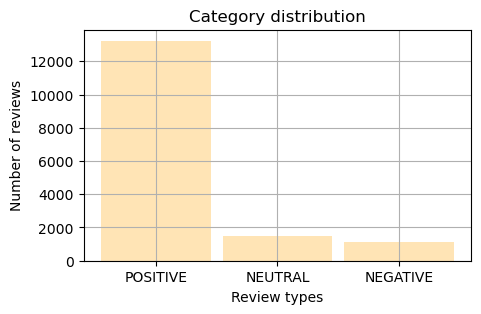

In [4]:
fig, ax = plt.subplots(figsize=(5, 3))

ax.bar(reviews.label.value_counts().index, 
       reviews.label.value_counts().values, 
       color = 'moccasin', width = 0.9)
plt.title("Category distribution")
plt.xlabel("Review types")
plt.ylabel("Number of reviews")
plt.grid(True)

In [5]:
label_encoding = {
    'POSITIVE': 2,
    'NEUTRAL': 1,
    'NEGATIVE': 0
}

In [6]:
reviews.label = reviews.label.apply(lambda label: label_encoding[label])
reviews

,review,label
0,В 1999 году этот фильм я и увидел. Его показыв...,2
1,В 1999 году этот фильм я и увидел. Его показыв...,2
2,"Один из лучших фильмов, которые, собственно, я...",2
3,Середина и конец девяностых оказались богатыми...,2
4,"Не читая книгу, мне трудно судить насколько фи...",2
...,...,...
22324,Да да Кристофер Нолан снял на столько великоле...,2
22325,Бред! Так думаешь сначала... Ничего не понятно...,2
22326,"Фильм достойный обсуждения, анализа, изучения....",2
22327,'Темный рыцарь' - один из моих самых любимых ф...,2


In [7]:
reviews = reviews[reviews.label != 1]
reviews

,review,label
0,В 1999 году этот фильм я и увидел. Его показыв...,2
1,В 1999 году этот фильм я и увидел. Его показыв...,2
2,"Один из лучших фильмов, которые, собственно, я...",2
3,Середина и конец девяностых оказались богатыми...,2
4,"Не читая книгу, мне трудно судить насколько фи...",2
...,...,...
22324,Да да Кристофер Нолан снял на столько великоле...,2
22325,Бред! Так думаешь сначала... Ничего не понятно...,2
22326,"Фильм достойный обсуждения, анализа, изучения....",2
22327,'Темный рыцарь' - один из моих самых любимых ф...,2


In [8]:
train, test = train_test_split(reviews, test_size=0.3, random_state=42)
print(train.shape, test.shape)
train

(10069, 2) (4316, 2)


,review,label
7126,Безусловно лучшее творение Бессона. Безупречна...,2
22072,"Как и многие, ждала этот фильм с нетерпением ...",0
17088,"На самом деле, очень хороший мультик.Долгое вр...",2
15030,Один из самых заслуженных «Оскаров» за лучший ...,2
14947,Лидер советского кинопроката далекого 1973 год...,2
...,...,...
5705,В общем недолюбливающая фильмы снятые по комик...,2
21225,"Помните в школе мальчишки баловались тем, что ...",2
5941,"Я поговорю не о фильме, обогнавшем в рейтингах...",2
932,"Если посмотреть фильм сейчас, в конце 2016 год...",2


In [9]:
# cnt_vec_text = CountVectorizer()
# train_vectorized = cnt_vec_text.fit_transform(train.review)
# train_vectorized

In [10]:
# cnt_vec_text.vocabulary_

---

In [27]:
cnt_vec = CountVectorizer()
X_train = cnt_vec.fit_transform(train.review)
X_test  = cnt_vec.transform(test.review)

print('CountVectorizing finished.')

clf = LogisticRegression(max_iter=200, n_jobs=-1, multi_class='multinomial')
clf.fit(X_train, train.label)
print(classification_report(test.label, clf.predict(X_test)))

CountVectorizing finished.
              precision    recall  f1-score   support

           0       0.65      0.46      0.54       324
           1       0.31      0.20      0.25       447
           2       0.90      0.96      0.93      4000

    accuracy                           0.86      4771
   macro avg       0.62      0.54      0.57      4771
weighted avg       0.83      0.86      0.84      4771



In [66]:
cnt_vec = CountVectorizer(tokenizer=TreebankWordTokenizer().tokenize)
X_train = cnt_vec.fit_transform(train.review)
X_test  = cnt_vec.transform(test.review)

print('CountVectorizing finished.')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

CountVectorizing finished.
0.9759980101977366
0.6734348561759729
              precision    recall  f1-score   support

           0       0.80      0.58      0.67       341
           2       0.97      0.99      0.98      3975

    accuracy                           0.96      4316
   macro avg       0.88      0.79      0.82      4316
weighted avg       0.95      0.96      0.95      4316



In [67]:
cnt_vec = TfidfVectorizer(tokenizer=TreebankWordTokenizer().tokenize)
X_train = cnt_vec.fit_transform(train.review)
X_test  = cnt_vec.transform(test.review)

print('TfidfVectorizing finished.')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

TfidfVectorizing finished.
0.9614221792236063
0.12121212121212122
              precision    recall  f1-score   support

           0       1.00      0.06      0.12       341
           2       0.93      1.00      0.96      3975

    accuracy                           0.93      4316
   macro avg       0.96      0.53      0.54      4316
weighted avg       0.93      0.93      0.90      4316



#### Balancing dataset

[SMOTE: метод увеличения числа примеров миноритарного класса](https://medium.com/nuances-of-programming/smote-%D0%BC%D0%B5%D1%82%D0%BE%D0%B4-%D1%83%D0%B2%D0%B5%D0%BB%D0%B8%D1%87%D0%B5%D0%BD%D0%B8%D1%8F-%D1%87%D0%B8%D1%81%D0%BB%D0%B0-%D0%BF%D1%80%D0%B8%D0%BC%D0%B5%D1%80%D0%BE%D0%B2-%D0%BC%D0%B8%D0%BD%D0%BE%D1%80%D0%B8%D1%82%D0%B0%D1%80%D0%BD%D0%BE%D0%B3%D0%BE-%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B0-da91a62f9914)
> Другим вариантом является увеличение примеров миноритарного класса. Иными словами, случайным образом дублируются образцы миноритарного класса. Проблема этого подхода заключается в том, что он приводит к чрезмерному обучению, поскольку модель обучается на одних и тех же примерах.

In [10]:
train.label.value_counts()

2    9261
0     808
Name: label, dtype: int64

In [11]:
train

,review,label
7126,Безусловно лучшее творение Бессона. Безупречна...,2
22072,"Как и многие, ждала этот фильм с нетерпением ...",0
17088,"На самом деле, очень хороший мультик.Долгое вр...",2
15030,Один из самых заслуженных «Оскаров» за лучший ...,2
14947,Лидер советского кинопроката далекого 1973 год...,2
...,...,...
5705,В общем недолюбливающая фильмы снятые по комик...,2
21225,"Помните в школе мальчишки баловались тем, что ...",2
5941,"Я поговорю не о фильме, обогнавшем в рейтингах...",2
932,"Если посмотреть фильм сейчас, в конце 2016 год...",2


In [12]:
train[train.label == 0]

,review,label
22072,"Как и многие, ждала этот фильм с нетерпением ...",0
8651,"Возможно, если бы я не читала книгу, то фильм ...",0
21207,"Фильм закончился, титры уплыли. Ну и… и что? Г...",0
7142,"Я тот, судя по всему, редкий человек, которому...",0
18677,"Гладиатор нравится многим, это и не удивительн...",0
...,...,...
837,Если почитать всё что писали люди выше - этот ...,0
3936,Никогда не понимал творения Кветина Тарантино!...,0
2237,Приступая к просмотру одного из самых известны...,0
2832,Классическая ситуация: На поход в кино данной ...,0


In [13]:
train = pd.concat([train, resample(train[train.label == 0], n_samples=8500, random_state=42)])
train

,review,label
7126,Безусловно лучшее творение Бессона. Безупречна...,2
22072,"Как и многие, ждала этот фильм с нетерпением ...",0
17088,"На самом деле, очень хороший мультик.Долгое вр...",2
15030,Один из самых заслуженных «Оскаров» за лучший ...,2
14947,Лидер советского кинопроката далекого 1973 год...,2
...,...,...
3124,"Фильмы Нолана – это, по сути, всегда ловкачест...",0
1662,Именно этими словами я начну свою рецензию. За...,0
8908,Боже мой! Что они сделали? Фильм просто разоча...,0
8013,После просмотра фильма я никак не мог отделать...,0


In [14]:
train.label.value_counts()

0    9308
2    9261
Name: label, dtype: int64

#### Training & Exploring `CountVectorizer`

In [15]:
cnt_vec = CountVectorizer(tokenizer=TreebankWordTokenizer().tokenize, max_df=0.6, max_features=1000)
X_train = cnt_vec.fit_transform(train.review)
print(f'{X_train.shape=}')
X_test  = cnt_vec.transform(test.review)

print('CountVectorizing finished.')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

KeyboardInterrupt: 

In [28]:
print(len(cnt_vec.get_feature_names_out()))
cnt_vec.get_feature_names_out()[:30]

1000


array(['!', '%', "'", "'начало", '(', ')', '-', '.', '..', '...', '/b',
       '/i', '1', '1995', '2', '3', '4', '5', '6', '7', '8', '9', ':',
       ';', '<', '>', '?', 'b', 'i', 'p.s.'], dtype=object)

In [53]:
# Just watching...
clf.decision_function(X_train[:10])  # Confidence scores for each sample

array([ 7.14938552, -3.25944661, 17.71304206,  7.63793307, 12.62043272,
       14.18661778, 17.76266587,  8.10928626,  1.65291985,  6.08774599])

In [142]:
cnt_vec.get_feature_names_out()[np.argpartition(clf.coef_[0], -30)[-30:]]

array(['станет', 'несмотря', 'каждого', 'картину', 'года.', 'другие',
       'музыкальное', 'моменты', 'одновременно', 'благодаря', 'душу',
       'ту', 'произведение', 'сне', 'бывает', 'отлично', '9', 'мэттью',
       '8', 'новые', 'атмосфера', 'создал', 'джек', 'думаю', 'одном',
       'жизнь.', 'писать', 'любит', 'помимо', 'впервые'], dtype=object)

In [143]:
cnt_vec.get_feature_names_out()[np.argpartition(clf.coef_[0], 30)[:30]]

array(['зрителя.', 'оценка', 'типа', 'какая-то', 'оказался', 'решили',
       'дом', 'понимаю', 'увидела', 'ди', 'авторы', 'сути', 'данного',
       'откровенно', '2', '3', '4', '5', '6', 'пытаются', 'видимо',
       'нечто', 'неужели', 'сожалению', '7', 'создатели', 'сей',
       'картинка', 'оценку', 'остальных'], dtype=object)

In [82]:
np.argpartition(np.abs(clf.coef_[0]), -10)[-10:]

array([519,  20, 583, 205,  35,  21, 408,  18,  17,  16], dtype=int64)

In [19]:
# _X_train = X_train.toarray()
# _X_train.shape

(18569, 1000)

In [21]:
# s = np.sum(_X_train, axis=0)
# s.shape

(1000,)

In [23]:
np.sort(s)[::-1][:5000]

array([52997, 52985, 40041, 38662, 31842, 31351, 29612, 27402, 25133,
       25069, 24788, 21735, 21332, 21277, 19883, 19697, 19291, 18419,
       18393, 18290, 18183, 17001, 16279, 15782, 15594, 14768, 14584,
       14445, 13828, 13585, 13512, 13381, 13353, 13321, 13290, 12375,
       12182, 12130, 11983, 11755, 11670, 11486, 11384, 11294, 10998,
       10950, 10945, 10830, 10760, 10748, 10257, 10085, 10044,  9766,
        9730,  9480,  8867,  8752,  8618,  8577,  8515,  8404,  8319,
        8211,  8157,  8106,  8095,  7996,  7983,  7950,  7935,  7890,
        7864,  7833,  7713,  7617,  7437,  7409,  7270,  7267,  7227,
        7186,  7186,  7160,  7117,  6965,  6854,  6838,  6824,  6752,
        6739,  6693,  6550,  6540,  6475,  6373,  6308,  6290,  6028,
        6019,  5893,  5875,  5827,  5702,  5692,  5675,  5666,  5623,
        5568,  5561,  5543,  5471,  5330,  5318,  5303,  5103,  5102,
        5011,  5011,  4952,  4839,  4818,  4788,  4777,  4728,  4700,
        4665,  4640,

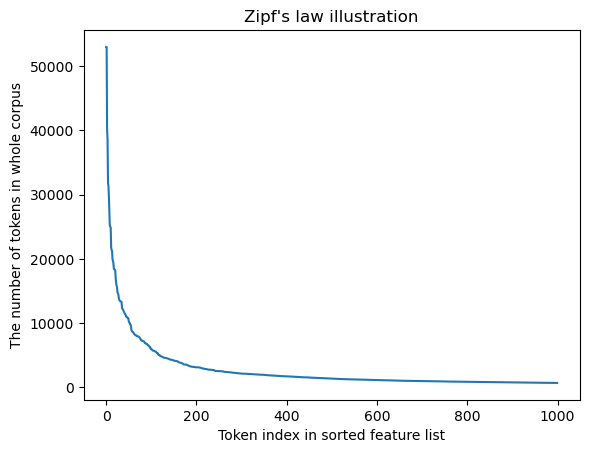

In [29]:
plt.plot(np.sort(s)[::-1])
plt.xlabel('Token index in sorted feature list')
plt.ylabel('The number of tokens in whole corpus')
plt.title("Zipf's law illustration")
plt.show()

#### What if binary coding chosen?

In [144]:
cnt_vec = CountVectorizer(tokenizer=TreebankWordTokenizer().tokenize, max_df=0.6, max_features=1000, binary=True)
X_train = cnt_vec.fit_transform(train.review)
print(f'{X_train.shape=}')
X_test  = cnt_vec.transform(test.review)

print('CountVectorizing finished.')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

X_train.shape=(18569, 1000)
CountVectorizing finished.
0.9483688671975341
0.524822695035461
              precision    recall  f1-score   support

           0       0.44      0.65      0.52       341
           2       0.97      0.93      0.95      3975

    accuracy                           0.91      4316
   macro avg       0.70      0.79      0.74      4316
weighted avg       0.93      0.91      0.91      4316



*Nothing positive happened.*

#### GB Classifier testing

In [148]:
cnt_vec = CountVectorizer(tokenizer=TreebankWordTokenizer().tokenize, max_df=0.6, max_features=1000)
X_train = cnt_vec.fit_transform(train.review)
print(f'{X_train.shape=}')
X_test  = cnt_vec.transform(test.review)

print('CountVectorizing finished.')

clf = GradientBoostingClassifier()
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

X_train.shape=(18569, 1000)
CountVectorizing finished.
0.9406535947712418
0.5376782077393076
              precision    recall  f1-score   support

           0       0.41      0.77      0.54       341
           2       0.98      0.91      0.94      3975

    accuracy                           0.89      4316
   macro avg       0.70      0.84      0.74      4316
weighted avg       0.93      0.89      0.91      4316



In [150]:
len(clf.feature_importances_)

1000

In [152]:
cnt_vec.get_feature_names_out()[np.argpartition(clf.feature_importances_, -30)[-30:]]

array(['самых', 'бы', 'вместо', 'мир', 'видимо', 'вообще', 'роль',
       'понимаю', 'ничего', 'который', 'каждый', 'именно', 'работа', '?',
       'ты', '<', '9', 'джейн', '7', '6', '5', '4', '3', '2', '1',
       'зачем', 'очень', '.', 'заставляет', 'жизнь'], dtype=object)

In [155]:
cnt_vec.get_feature_names_out()[np.argpartition(clf.feature_importances_, 30)[:30]]

array(['обязательно', 'обычно', 'остальных', 'остальные', 'осталось',
       'остается', 'оставляет', 'особо', 'оскар', 'опять', 'они',
       'оказывается', 'оказался', 'оказалось', 'одну', 'одном', 'одной',
       'одного', 'одновременно', 'одним', 'однако', 'одна', 'увидеть',
       'огромное', 'остин', 'уровне', 'факт', 'ним', 'никто', 'никого'],
      dtype=object)

#### Training & Exploring `TfidfVectorizer`

In [16]:
tfidf_vec = TfidfVectorizer(tokenizer=TreebankWordTokenizer().tokenize)
X_train = tfidf_vec.fit_transform(train.review)
print(f'{X_train.shape=}')
X_test  = tfidf_vec.transform(test.review)

print('TfidfVectorizing finished.')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

X_train.shape=(18569, 215812)
TfidfVectorizing finished.
0.9650866462793068
0.6505102040816327
              precision    recall  f1-score   support

           0       0.58      0.75      0.65       341
           2       0.98      0.95      0.97      3975

    accuracy                           0.94      4316
   macro avg       0.78      0.85      0.81      4316
weighted avg       0.95      0.94      0.94      4316



In [17]:
X_train

<18569x215812 sparse matrix of type '<class 'numpy.float64'>'
	with 5013759 stored elements in Compressed Sparse Row format>

In [18]:
_X_train = X_train.toarray()
_X_train.shape

(18569, 215812)

---

In [52]:
def bestTokenizerEver(review: str, inner_tokenizer=TreebankWordTokenizer().tokenize):
    assert type(review) == str, 'Wrong input type'
    
    review = review.lower()
    
    tokenized_review = inner_tokenizer(review)
    
    lemmatizer = Mystem()
    tokenized_review = lemmatizer.lemmatize(' '.join(tokenized_review))
    
    return tokenized_review

In [ ]:
# bestTokenizerEver(train.iloc[0][0])

In [ ]:
cnt_vec = CountVectorizer(tokenizer=bestTokenizerEver)
X_train = cnt_vec.fit_transform(train.review)
X_test  = cnt_vec.transform(test.review)

print('CountVectorizing finished.')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

---

#### Exploring Word2Vec

In [17]:
train

,review,label
7126,Безусловно лучшее творение Бессона. Безупречна...,2
22072,"Как и многие, ждала этот фильм с нетерпением ...",0
17088,"На самом деле, очень хороший мультик.Долгое вр...",2
15030,Один из самых заслуженных «Оскаров» за лучший ...,2
14947,Лидер советского кинопроката далекого 1973 год...,2
...,...,...
3124,"Фильмы Нолана – это, по сути, всегда ловкачест...",0
1662,Именно этими словами я начну свою рецензию. За...,0
8908,Боже мой! Что они сделали? Фильм просто разоча...,0
8013,После просмотра фильма я никак не мог отделать...,0


In [17]:
tokenizer = TreebankWordTokenizer()

In [18]:
train = pd.concat([pd.Series(map(tokenizer.tokenize, train.review), index=train.label.index), 
                   train.label],
                   axis=1)
train.columns = test.columns

test = pd.concat([pd.Series(map(tokenizer.tokenize, test.review), index=test.label.index), 
                   test.label],
                   axis=1)
test.columns = train.columns
train

,review,label
7126,"[Безусловно, лучшее, творение, Бессона., Безуп...",2
22072,"[Как, и, многие, ,, ждала, этот, фильм, с, нет...",0
17088,"[На, самом, деле, ,, очень, хороший, мультик.Д...",2
15030,"[Один, из, самых, заслуженных, «Оскаров», за, ...",2
14947,"[Лидер, советского, кинопроката, далекого, 197...",2
...,...,...
3124,"[Фильмы, Нолана, –, это, ,, по, сути, ,, всегд...",0
1662,"[Именно, этими, словами, я, начну, свою, рецен...",0
8908,"[Боже, мой, !, Что, они, сделали, ?, Фильм, пр...",0
8013,"[После, просмотра, фильма, я, никак, не, мог, ...",0


In [138]:
pd.Series(map(TreebankWordTokenizer().tokenize, train.review), index=train.label.index)

7126     [Безусловно, лучшее, творение, Бессона., Безуп...
22072    [Как, и, многие, ,, ждала, этот, фильм, с, нет...
17088    [На, самом, деле, ,, очень, хороший, мультик.Д...
15030    [Один, из, самых, заслуженных, «Оскаров», за, ...
14947    [Лидер, советского, кинопроката, далекого, 197...
1748     [«Моя, мама, всегда, говорила, :, «Жизнь, как,...
21696    [Поскольку, рецензий, на, 'Начало, ', написано...
22240    [Не, даром, столько, шума, вокруг, и, столько,...
9180     [В, общем, ,, фильм, понравился., Я, раза, 4, ...
14152    [«Бойцовский, клуб», ,, я, думаю, ,, на, начал...
dtype: object

In [135]:
train.label

7126     2
22072    0
17088    2
15030    2
14947    2
        ..
3124     0
1662     0
8908     0
8013     0
2810     0
Name: label, Length: 18569, dtype: int64

In [165]:
train.review

7126     [Безусловно, лучшее, творение, Бессона., Безуп...
22072    [Как, и, многие, ,, ждала, этот, фильм, с, нет...
17088    [На, самом, деле, ,, очень, хороший, мультик.Д...
15030    [Один, из, самых, заслуженных, «Оскаров», за, ...
14947    [Лидер, советского, кинопроката, далекого, 197...
                               ...                        
3124     [Фильмы, Нолана, –, это, ,, по, сути, ,, всегд...
1662     [Именно, этими, словами, я, начну, свою, рецен...
8908     [Боже, мой, !, Что, они, сделали, ?, Фильм, пр...
8013     [После, просмотра, фильма, я, никак, не, мог, ...
2810     [Интерстеллар, –, фильм, ,, которого, многие, ...
Name: review, Length: 18569, dtype: object

In [248]:
train.review[0:1]

7126    [Безусловно, лучшее, творение, Бессона., Безуп...
Name: review, dtype: object

In [22]:
%%time

model = Word2Vec(sentences=train.review, 
                          vector_size=300, 
                          window=5,
                    )

Wall time: 37.5 s


In [23]:
model.wv['том'].shape

(300,)

In [27]:
model.wv.most_similar(positive='Алиса', topn=10)

KeyError: "Key 'Алиса' not present"

In [29]:
model.wv.most_similar(positive=(model.wv['монстр']-model.wv['ужас']), topn=10)

[('Толкина.', 0.43248140811920166),
 ('Уильямс.', 0.3997892141342163),
 ('3-й', 0.394602507352829),
 ('сюжетом.', 0.386676549911499),
 ('достойной', 0.3828672766685486),
 ('детский.', 0.3818534016609192),
 ('спасают.', 0.3745390772819519),
 ('Оценку', 0.3718530535697937),
 ('«зашёл»', 0.3706556558609009),
 ('уважением.', 0.3668305277824402)]

In [159]:
train.review

7126     [Безусловно, лучшее, творение, Бессона., Безуп...
22072    [Как, и, многие, ,, ждала, этот, фильм, с, нет...
17088    [На, самом, деле, ,, очень, хороший, мультик.Д...
15030    [Один, из, самых, заслуженных, «Оскаров», за, ...
14947    [Лидер, советского, кинопроката, далекого, 197...
                               ...                        
3124     [Фильмы, Нолана, –, это, ,, по, сути, ,, всегд...
1662     [Именно, этими, словами, я, начну, свою, рецен...
8908     [Боже, мой, !, Что, они, сделали, ?, Фильм, пр...
8013     [После, просмотра, фильма, я, никак, не, мог, ...
2810     [Интерстеллар, –, фильм, ,, которого, многие, ...
Name: review, Length: 18569, dtype: object

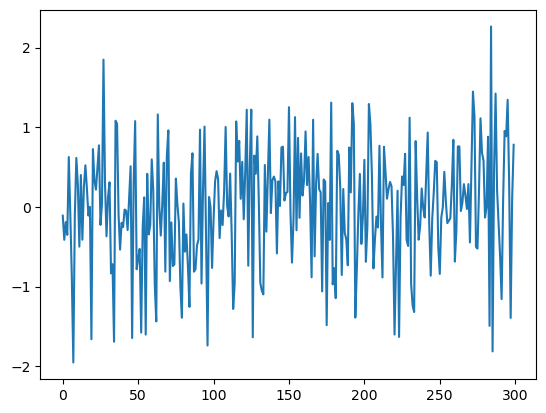

In [215]:
plt.plot(model.wv.get_vector(0))

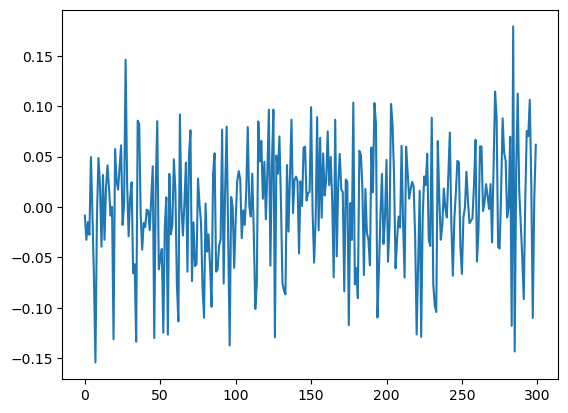

In [216]:
plt.plot(model.wv.get_normed_vectors()[0])

In [222]:
model.predict_output_word(['хотите'])

[('вы', 0.9776759),
 ('если', 0.01145803),
 ('Вы', 0.0049927887),
 ('Если', 0.0046948916),
 ('увидеть', 0.0011114695),
 ('хотите', 1.5001338e-05),
 ('посмотрите', 1.4101071e-05),
 ('посмотреть', 1.3088356e-05),
 ('смотрите', 5.57677e-06),
 ('смотреть', 4.3877812e-06)]

In [225]:
train

,review,label
7126,"[Безусловно, лучшее, творение, Бессона., Безуп...",2
22072,"[Как, и, многие, ,, ждала, этот, фильм, с, нет...",0
17088,"[На, самом, деле, ,, очень, хороший, мультик.Д...",2
15030,"[Один, из, самых, заслуженных, «Оскаров», за, ...",2
14947,"[Лидер, советского, кинопроката, далекого, 197...",2
...,...,...
3124,"[Фильмы, Нолана, –, это, ,, по, сути, ,, всегд...",0
1662,"[Именно, этими, словами, я, начну, свою, рецен...",0
8908,"[Боже, мой, !, Что, они, сделали, ?, Фильм, пр...",0
8013,"[После, просмотра, фильма, я, никак, не, мог, ...",0


In [244]:
train.review.map(lambda tokens: 'Бессона.' in tokens)

7126      True
22072    False
17088    False
15030    False
14947    False
         ...  
3124     False
1662     False
8908     False
8013     False
2810     False
Name: review, Length: 18569, dtype: bool

In [234]:
train.review[1:].map(lambda tokens: list(map(lambda token: model.wv[token],  tokens)))

KeyError: "Key 'мультик.Долгое' not present"

In [30]:
'мультик.Долгое' in model.wv.index_to_key

False

In [21]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [22]:
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train.review.values)]

In [48]:
%%time

model = Doc2Vec(documents=documents, 
                          vector_size=300, 
                          window=5,
                          workers=12
                    )

Wall time: 1min 42s


In [35]:
model.wv.index_to_key

[' ',
 'о',
 'е',
 'а',
 'и',
 'т',
 'н',
 'с',
 'р',
 'л',
 'в',
 'м',
 'к',
 'д',
 'п',
 'у',
 'ь',
 ',',
 'я',
 'ы',
 'г',
 'з',
 'ч',
 'б',
 '.',
 'й',
 'ж',
 'х',
 'ю',
 '\n',
 '\r',
 'ш',
 'ф',
 'э',
 'ц',
 'щ',
 '-',
 'Н',
 "'",
 'В',
 'К',
 'ё',
 'Д',
 'П',
 '>',
 '<',
 'О',
 'С',
 'И',
 '»',
 '«',
 'Т',
 'М',
 '?',
 'b',
 'Б',
 '0',
 '1',
 '!',
 'А',
 ')',
 '/',
 '(',
 'Э',
 '—',
 ':',
 'Г',
 'Л',
 'Р',
 'i',
 'Ф',
 'Х',
 'Е',
 'З',
 'Я',
 'Ч',
 '–',
 'У',
 '…',
 '2',
 'Ш',
 'ъ',
 '9',
 '5',
 'e',
 '3',
 'o',
 'a',
 'n',
 '4',
 't',
 'r',
 ';',
 '8',
 's',
 'Ж',
 'I',
 '7',
 'P',
 '6',
 'l',
 'h',
 'B',
 'S',
 'Ц',
 'D',
 'u',
 'c',
 'd',
 'y',
 'm',
 'p',
 '%',
 'M',
 '+',
 'Ю',
 'g',
 '\t',
 'A',
 '”',
 '“',
 'Й',
 'X',
 'f',
 'k',
 'T',
 'w',
 'v',
 'Ь',
 'C',
 'W',
 'x',
 'Ы',
 '*',
 'H',
 'L',
 'R',
 'V',
 'F',
 'N',
 '`',
 'E',
 'G',
 'O',
 '\xa0',
 '#',
 '&',
 '=',
 '©',
 'J',
 '$',
 'K',
 '•',
 '’',
 'Y',
 'Щ',
 '\\',
 '_',
 '№',
 '[',
 ']',
 'Ё',
 'Q',
 'j',
 'U',
 'Z

In [37]:
model.dv.get_normed_vectors()

KeyboardInterrupt: 

In [ ]:
train_tagged = [TaggedDocument(doc, [i]) for i, doc in enumerate(train.review.values)]
test_tagged = [TaggedDocument(doc, [i]) for i, doc in enumerate(test.review.values)]

print('Tagging finished')

In [43]:
X_train = list(map(lambda document: model.infer_vector([document.words]), train_tagged))
print(f'{len(X_train)=}')
X_test  = list(map(lambda document: model.infer_vector([document.words]), test_tagged))

print('Training classifier...')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

Tagging finished
len(X_train)=18569
Training classifier...
0.10897891494906421
0.14735887553842666
              precision    recall  f1-score   support

           0       0.08      0.95      0.15       341
           2       0.93      0.06      0.11      3975

    accuracy                           0.13      4316
   macro avg       0.51      0.51      0.13      4316
weighted avg       0.87      0.13      0.11      4316



In [51]:
len(X_test)

4316

In [45]:
X_train = list(map(lambda document: model.infer_vector([document.words]), train_tagged))
print(f'{len(X_train)=}')
X_test  = list(map(lambda document: model.infer_vector([document.words]), test_tagged))

print('Training classifier...')

clf = LogisticRegression(max_iter=200, n_jobs=-1)
clf.fit(X_train, train.label)
pred = clf.predict(X_test)

print(f1_score(test.label, pred, pos_label=2))
print(f1_score(test.label, pred, pos_label=0))
print(classification_report(test.label, pred))

len(X_train)=18569
Training classifier...
0.10897891494906421
0.14735887553842666
              precision    recall  f1-score   support

           0       0.08      0.95      0.15       341
           2       0.93      0.06      0.11      3975

    accuracy                           0.13      4316
   macro avg       0.51      0.51      0.13      4316
weighted avg       0.87      0.13      0.11      4316



In [17]:
from datasets.getters import load_reviews

load_reviews()

,kinopoiskId,type,date,positiveRating,negativeRating,author,title,film_id
"«Зеленую милю» я смотрела два раза: 10 лет назад и сейчас. \r\n\r\nПервый раз у меня было примерно такое впечатление, о котором говорят большинство зрителей. Я плакала над глубокой и грустной историей, которая надолго оставила след в душе, тем более, что я была подростком. \r\n\r\nНесколько лет назад прочитала оригинальный роман Кинга и периодически думала, насколько хороша и точна экранизация (хотя сам фильм я уже успела подзабыть, некоторые моменты еще были живы в памяти). \r\n\r\nСейчас же я решила освежить впечатления и пощекотать эмоции, но это парадоксальным образом не сработало. После взросления и прочтения книги фильм Дарабонта показался мне плоским, как блин, и даже немного не раскрывающим темы, на которые замахивается. Это довольно странно, учитывая, что фильм идет три часа, при этом являясь экранизацией не такой уж и большой книги.\r\n\r\nТемы расизма, злоупотребления властью, жизни и смерти — все это отдается на откуп зрительскому восприятию. Особенно нелепа вся эта линия с травлей Перси: за весь фильм толком непонятно, за что сослуживцы так его ненавидят. За то, что хочет убить милое, но потенциально вредное животное? За то, что работает по блату (во времена Депрессии, ага)? Если честно, эта сюжетная линия выглядит как разборки старшеклассников, а не как работа тюремного блока. \r\n\r\nИ кстати, ради большей слезовыжималки сценаристы умолчали преступление Делакруа, выставив его чуть ли не положительным персонажем. Мне и в романе-то не нравилось постоянные заигрывания тюремщиков с ним, но здесь это выкрутили да абсурда.\r\n\r\nВина ли это сценариста и режиссера? Да нет, в общем. Просто «Зеленую милю» невозможно экранизировать. Помимо самих событий там много рефлексии, печальных воспоминаний, внутренних рассуждений героев о морали и общественных нормах. Это не такой большой, но плотный роман, под завязку забитый вещами, которые нельзя перевести на язык кино. \r\n\r\nИ все же я считаю, что Дарабонт сделал все, что в его силах, и фильм получился настолько хорошим, насколько это вообще было возможно. И кстати, кое-что получилось идеально: атмосфера фильма идеально передает общий тон книги. Про актерскую игру и речи нет. Особенно запал в душу Майкл Кларк Дункан. Он проделал фантастическую работу даже по меркам профессиональных актеров, а ведь у него вроде как не было полноценного образования.\r\n\r\nХотя сейчас я уже не испытываю от фильма тех же чувств, что и раньше, считаю огромной несправедливостью, что он не взял ни одного «Оскара». Очень жаль: у картины были все шансы.",3221833,NEUTRAL,2023-01-28T20:58:59,4,7,Yanchessa,None,435
"Период конца девяностых годов-начало двухтысячных подарил нам большое количество великолепных и качественных кинолент, которые до сегодняшнего дня мы пересматриваем и каждый раз получаем удовольствие, 'Зелёная миля' режиссёра Фрэнка Дарабонта как раз из тех фильмов, и который я также совсем недавно пересмотрел. Фильм снят по мотивам романа Стивена Кинга 'Зеленая Миля'. \r\n\r\n Главную роль исполнил легендарный Том Хэнкс, который давно уже вошёл в список Голливуда как один из лучших харизматичных и талантливых актёров. События в картине разворачиваются в 1935 году, Том иполнил роля начальника тюремного блока смертников по имени Пол Эджкомб. Работа не самая приятная, так как каждый день приходится иметь дело с омерзительными личностями, сидящими в тюремных камерах, хотя не все эти личности и омерзительные, некоторые из выглядят вполне нормальными людьми, но никогда не знаешь о чём они думают, ведь всё же эти люди совершили убийства, а у Пола также есть проблем со здоровьем. \r\n\r\nВсё меняется, когда в один из дней в тюрьму привозят гиганта Джона Коффи (Майкл Кларк Дункан), и с того самого момента для Пола и его коллег по работе много в жизни изменится.\r\n\r\nАтмосфера фильма выдержана на высоком уровне, тюремный блок, камеры, заключенные - вс по минимуму, но это и придаёт фильму свою мрачную атмосферу. \r\n\r\n Фил